1 矩阵特征值与特征向量

In [1]:
import numpy as np

In [2]:
a = np.array([[5,6],[7,8]])

In [3]:
r1,r2 = np.linalg.eig(a)

In [4]:
print(r1)  #特征值

[-0.15206735 13.15206735]


In [5]:
type(r1)

numpy.ndarray

In [6]:
print(r2)  #特征向量

[[-0.75868086 -0.59276441]
 [ 0.65146248 -0.80537591]]


In [7]:
type(r2)

numpy.ndarray

2 求解线性方程组

李大叔去年承包了10亩地种植甲、乙两种蔬菜，共获利18000元，其中甲种蔬菜每亩获利2000元，乙种蔬菜每亩获利1500元，李大叔去年甲、乙两种蔬菜各种植了多少亩？


In [8]:
A = np.array([[1,1],[2000,1500]])

In [9]:
B = np.array([10,18000])

In [10]:
result = np.linalg.solve(A,B)

In [11]:
result

array([6., 4.])

3 求解向量的相似性

In [12]:
def angle_between(v1, v2):
    dot_pr = v1.dot(v2)
    norms = np.linalg.norm(v1) * np.linalg.norm(v2)
    return np.rad2deg(np.arccos(dot_pr / norms))

In [13]:
v = np.array([1, 4, 5])
u = np.array([2, 1, 5])   #演示u = np.array([2, 1, 5])


In [14]:
print(angle_between(v, u))


29.152519407030084


4 奇异值分解

In [8]:
A = np.array([[1,2],[1,1],[0,0]])

In [9]:
p,sigma,q = np.linalg.svd(A)

In [10]:
p

array([[-0.85065081, -0.52573111,  0.        ],
       [-0.52573111,  0.85065081,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [11]:
q

array([[-0.52573111, -0.85065081],
       [ 0.85065081, -0.52573111]])

In [12]:
sigma

array([2.61803399, 0.38196601])

In [21]:
tmp = np.diag(sigma)

In [22]:
tmp

array([[2.61803399, 0.        ],
       [0.        , 0.38196601]])

案例：利用图片进行SVD解

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

In [23]:
from skimage import io

In [24]:
img = io.imread('ng33.jpg')

In [25]:
m,n = img.shape

In [26]:
m,n

(870, 870)

In [27]:
P, sigma, Q = np.linalg.svd(img)

In [28]:
P.shape

(870, 870)

In [29]:
sigma.shape

(870,)

In [30]:
tmp = np.diag(sigma)

In [31]:
tmp.shape

(870, 870)

In [32]:
if m < n:
    d = np.hstack((tmp,np.zeros((m,n-m),dtype = float)))
else:
    d = np.vstack((tmp,np.zeros((m-n,n),dtype = float)))

In [33]:
d.shape

(870, 870)

In [34]:
d

array([[1.16600282e+05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.17289858e+04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.87816944e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.41532896e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.91482993e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 8.99320156e-03]])

In [35]:
k = 100  #通过调整不同的K值 ，进行图像观察，当k=50的时候，就和原图像差不多。

In [36]:
img2 = P[:,:k].dot(d[:k,:k]).dot(Q[:k,:])

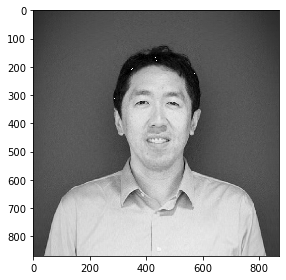

In [37]:
io.imshow(np.uint8(img2))